<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingRFDTRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/BostonHousing.csv")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
import warnings
warnings.filterwarnings("ignore")
y = df.medv
x = df.drop('medv', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)


In [5]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [16]:
#Linear Regression
from time import time
from sklearn.linear_model import LinearRegression

t0 = time()
lgr = LinearRegression()
lgr.fit(X_train, y_train)

print('Train Data')
y_pred = lgr.predict(X_train)
evalmetric(y_train, y_pred)

print('Test Data')
y_pred2 = lgr.predict(X_test)
evalmetric(y_test, y_pred2)

Train Data
MSE: 22.477090408387628
RMSE: 4.741000992236516
MAE: 3.3500095196484527
MAPE: 16.51340923146332
R-Squared: 0.7383393920590519
Test Data
MSE: 20.869292183770686
RMSE: 4.568292042303193
MAE: 3.2132704958423735
MAPE: 17.23229896841005
R-Squared: 0.7334492147453092


In [6]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = dtr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = dtr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0
Test Data
MSE: 29.49676470588235
RMSE: 5.431092404469137
MAE: 3.055882352941176
MAPE: 15.487610823159242
R-Squared: 0.62325575177197


In [7]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.4753578811881203
RMSE: 1.2146431085665124
MAE: 0.8167871287128715
MAPE: 4.283704283353454
R-Squared: 0.9828250439399356
Test Data
MSE: 11.343304745098038
RMSE: 3.367982295840944
MAE: 2.2495882352941172
MAPE: 12.217146851961408
R-Squared: 0.855118862654074


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time

gbr = GradientBoostingRegressor(random_state=5)
gbr.fit(X_train, y_train)
print('Train Data')
y_pred = gbr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = gbr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.8932814816593
RMSE: 1.3759656542440657
MAE: 1.09514690693163
MAPE: 5.736529851475533
R-Squared: 0.9779599060868908
Test Data
MSE: 9.514455033587492
RMSE: 3.08455102625771
MAE: 1.9923692196867757
MAPE: 10.879581462293823
R-Squared: 0.8784776484922945


In [9]:
# fit model no training data
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=5)
xgr.fit(X_train, y_train)
print('Train Data')
y_pred = xgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = xgr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 0.00020630069758811786
RMSE: 0.01436317157135282
MAE: 0.009723323406559419
MAPE: 0.050356873214979926
R-Squared: 0.9999975984095375
Test Data
MSE: 9.810971219511716
RMSE: 3.1322469920987577
MAE: 2.143903751934276
MAPE: 11.291434980288354
R-Squared: 0.8746904274642479


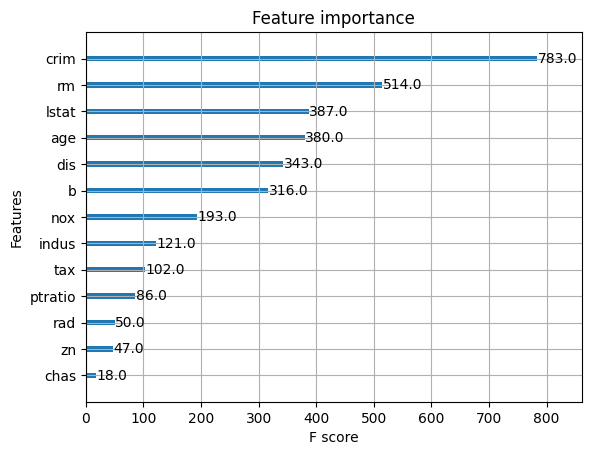

In [10]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(xgr)
pyplot.show()

In [11]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [21]:
import catboost as cb
cat = cb.CatBoostRegressor(random_state=5)
cat.fit(X_train, y_train)
print('Train Data')
y_predcat = cat.predict(X_train)
evalmetric(y_train,y_predcat)
print('Test Data')
y_predcat2 = cat.predict(X_test)
evalmetric(y_test,y_predcat2)

Learning rate set to 0.03548
0:	learn: 9.1049114	total: 11.3ms	remaining: 11.3s
1:	learn: 8.9012029	total: 13.2ms	remaining: 6.57s
2:	learn: 8.7456482	total: 24.2ms	remaining: 8.03s
3:	learn: 8.5474729	total: 25.9ms	remaining: 6.46s
4:	learn: 8.3742215	total: 46.3ms	remaining: 9.21s
5:	learn: 8.2380083	total: 52.6ms	remaining: 8.71s
6:	learn: 8.0623931	total: 61.9ms	remaining: 8.78s
7:	learn: 7.8950065	total: 66.2ms	remaining: 8.21s
8:	learn: 7.7249556	total: 72.4ms	remaining: 7.97s
9:	learn: 7.5659502	total: 76.5ms	remaining: 7.57s
10:	learn: 7.4238421	total: 81.5ms	remaining: 7.32s
11:	learn: 7.2702850	total: 86ms	remaining: 7.08s
12:	learn: 7.1502829	total: 90ms	remaining: 6.83s
13:	learn: 7.0092082	total: 98.6ms	remaining: 6.94s
14:	learn: 6.8764793	total: 103ms	remaining: 6.79s
15:	learn: 6.7568659	total: 111ms	remaining: 6.83s
16:	learn: 6.6278132	total: 115ms	remaining: 6.66s
17:	learn: 6.5043599	total: 121ms	remaining: 6.62s
18:	learn: 6.3917505	total: 130ms	remaining: 6.72s
19

In [22]:
from time import time
import lightgbm as lgb
t0 = time()
lgr = lgb.LGBMRegressor(random_state=5, verbose=-1)
lgr.fit(X_train, y_train)
print('Train Data')
y_pred = lgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = lgr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.9315314203299487
RMSE: 1.3897954598896733
MAE: 0.8489484530654504
MAPE: 4.339653294117909
R-Squared: 0.9775146303850796
Test Data
MSE: 10.874898231511061
RMSE: 3.2977110594336585
MAE: 2.2417334323224862
MAPE: 12.072782870217381
R-Squared: 0.8611015343669226
